In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('happiness_score.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

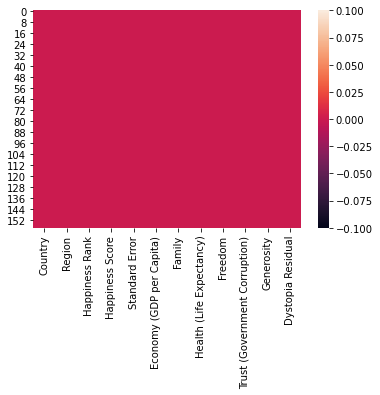

In [7]:
sn.heatmap(df.isnull())

There is no null value

In [9]:
df.loc[df['Dystopia Residual']== " "]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb=LabelEncoder()
df['Country']=lb.fit_transform(df['Country'])
df['Region']=lb.fit_transform(df['Region'])

In [12]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df.dtypes

# Visualization

In [ ]:
sn.countplot(x="Region", data=df)
print(df['Region'].value_counts())

From the above observations we get more pople are from region 8 and region 1

In [ ]:
sn.distplot(df['Happiness Score'], kde=True)

In [ ]:
sn.distplot(df['Standard Error'], kde=True)

In [ ]:
sn.distplot(df['Economy (GDP per Capita)'], kde=True)

In [ ]:
sn.distplot(df['Family'], kde=True)

In [ ]:
sn.distplot(df['Health (Life Expectancy)'], kde=True)

In [ ]:
sn.distplot(df['Freedom'], kde=True)

In [ ]:
sn.distplot(df['Trust (Government Corruption)'], kde=True)

In [ ]:
sn.distplot(df['Generosity'], kde=True)

In [ ]:
sn.distplot(df['Dystopia Residual'], kde=True)

In [ ]:
sn.pairplot(df,hue="Dystopia Residual")

# Checking Outlier

Country                             AxesSubplot(0.125,0.536818;0.110714x0.343182)
Region                           AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Happiness Rank                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Family                                 AxesSubplot(0.125,0.125;0.110714x0.343182)
Health (Life Expectancy)            AxesSubplot(0.257857,0.125;0.110714x0.343182)
Freedom                             AxesSubplot(0.390714,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.523571,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.656429,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

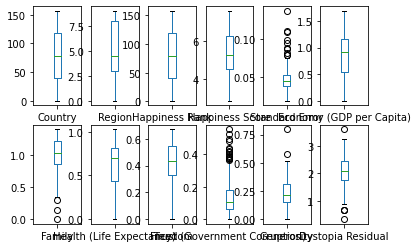

In [13]:

df.plot(kind='box',subplots=True,layout=(2,6))

<AxesSubplot:>

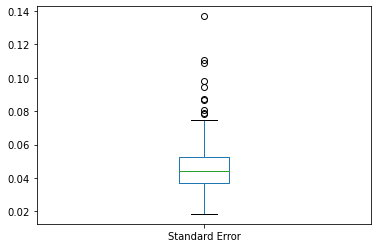

In [14]:
df['Standard Error'].plot.box()

In [ ]:
df['Trust (Government Corruption)'].plot.box()

In [ ]:
df['Dystopia Residual'].plot.box()

# Outlier Handling with Zscore

In [15]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

In [16]:
df1=df[(z<3).all(axis=1)]
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


As data loss is less than 10 percent so we wil work with new dataframe

In [17]:
df1.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [18]:
from scipy.stats import boxcox
#0- Log transform(to remove sckewness)
df1['Family']=boxcox(df1['Family'],0)

<ipython-input-18-f5fb464e8a94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Family']=boxcox(df1['Family'],0)


C:\Users\rupam\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family', ylabel='Density'>

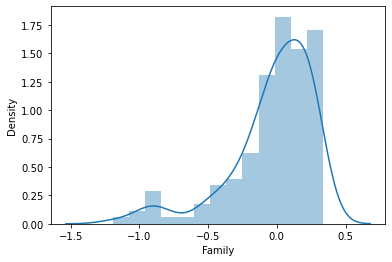

In [19]:
sn.distplot(df1['Family'], kde=True)

In [20]:
df1['Trust (Government Corruption)']=boxcox(df1['Trust (Government Corruption)'],0)

ValueError: Data must be positive.

In [21]:
df1.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.067114,5.080537,77.617450,5.429611,0.046241,0.862163,-0.031908,0.638624,0.427449,0.140405,0.231500,2.120862
std,45.833079,3.032519,44.854208,1.111256,0.014043,0.387975,0.308696,0.245937,0.150864,0.113385,0.119897,0.525654
min,0.000000,0.000000,1.000000,2.905000,0.018480,0.000000,-1.194518,0.000000,0.000000,0.000000,0.000000,0.654290
25%,38.000000,3.000000,39.000000,4.610000,0.036800,0.593250,-0.121174,0.467210,0.328180,0.061460,0.142720,1.792930
50%,76.000000,4.000000,78.000000,5.268000,0.043610,0.920490,0.034556,0.703800,0.434500,0.107130,0.213330,2.100170
75%,116.000000,8.000000,115.000000,6.295000,0.050690,1.159910,0.202067,0.814440,0.546040,0.175210,0.300300,2.465310
max,157.000000,9.000000,157.000000,7.587000,0.098110,1.563910,0.338064,1.025250,0.669730,0.492100,0.576300,3.602140


In [22]:
df1.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.007739,-0.125380,0.120109,0.003898,0.039300,0.221999,0.036875,0.091495,0.062379,0.096685,0.048980
Region,0.007739,1.000000,0.184520,-0.145850,-0.013860,-0.224928,-0.146619,-0.334531,0.101335,0.167550,0.305791,-0.059494
Happiness Rank,-0.125380,0.184520,1.000000,-0.992921,0.212085,-0.773651,-0.663432,-0.736758,-0.571089,-0.445743,-0.225626,-0.526680
Happiness Score,0.120109,-0.145850,-0.992921,1.000000,-0.230252,0.773577,0.663219,0.729191,0.585066,0.477692,0.250903,0.528334
Standard Error,0.003898,-0.013860,0.212085,-0.230252,1.000000,-0.251749,-0.077959,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy (GDP per Capita),0.039300,-0.224928,-0.773651,0.773577,-0.251749,1.000000,0.588876,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.221999,-0.146619,-0.663432,0.663219,-0.077959,0.588876,1.000000,0.462062,0.414559,0.206289,0.104280,0.094551
Health (Life Expectancy),0.036875,-0.334531,-0.736758,0.729191,-0.356444,0.817470,0.462062,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.091495,0.101335,-0.571089,0.585066,-0.186465,0.376780,0.414559,0.382595,1.000000,0.506373,0.428718,0.058596
Trust (Government Corruption),0.062379,0.167550,-0.445743,0.477692,-0.140156,0.342269,0.206289,0.270605,0.506373,1.000000,0.296450,0.078080


<AxesSubplot:>

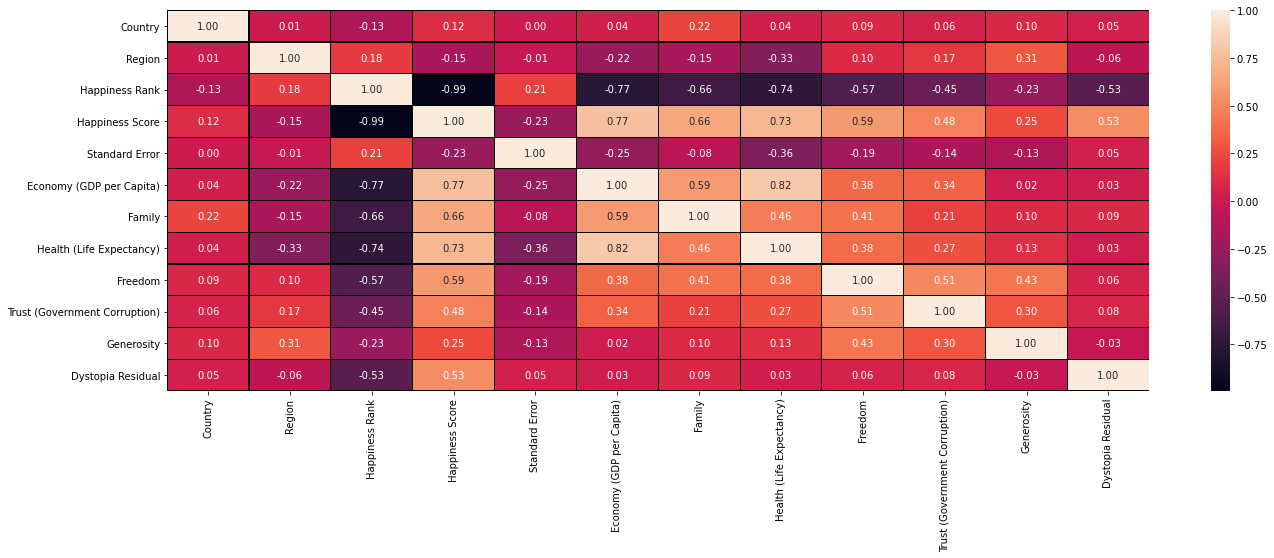

In [23]:
plt.figure(figsize=(22,7))
sn.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

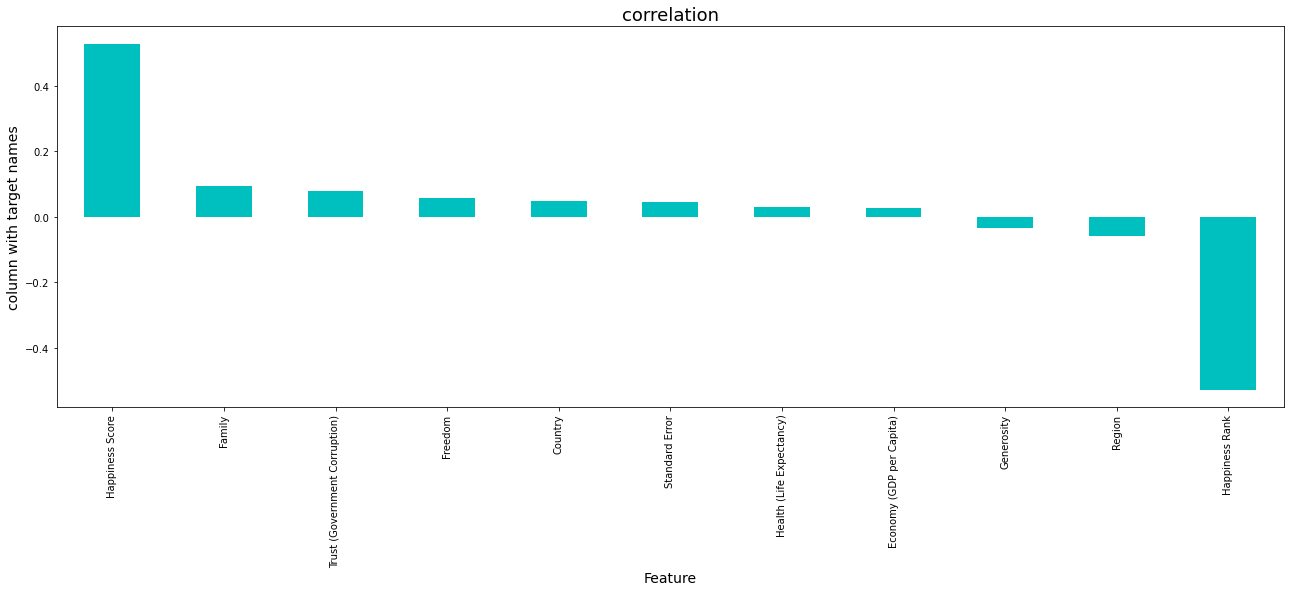

In [24]:
plt.figure(figsize=(22,7))
df1.corr()['Dystopia Residual'].sort_values(ascending=False).drop(['Dystopia Residual']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [25]:
x=df1.iloc[:,0:-1]
x.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,135,9,1,7.587,0.03411,1.39651,0.299742,0.94143,0.66557,0.41978,0.29678
1,58,9,2,7.561,0.04884,1.30232,0.338064,0.94784,0.62877,0.14145,0.43630
2,37,9,3,7.527,0.03328,1.32548,0.307911,0.87464,0.64938,0.48357,0.34139
3,105,9,4,7.522,0.03880,1.45900,0.285893,0.88521,0.66973,0.36503,0.34699
4,24,5,5,7.427,0.03553,1.32629,0.279607,0.90563,0.63297,0.32957,0.45811


In [26]:
x.shape

(149, 11)

In [27]:
y=df1.iloc[:,-1]
y.head()

0    2.51738
1    2.70201
2    2.49204
3    2.46531
4    2.45176
Name: Dystopia Residual, dtype: float64

In [28]:
y.shape

(149,)

In [31]:

from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [30]:
lr=LinearRegression()

In [32]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9933289460409357
At random state 0,the testing accuracy is:- 0.9950226790382052


At random state 1,the training accuracy is:- 0.9934168720355535
At random state 1,the testing accuracy is:- 0.9945500739974267


At random state 2,the training accuracy is:- 0.9934275172992056
At random state 2,the testing accuracy is:- 0.9947084816943593


At random state 3,the training accuracy is:- 0.9929976227168231
At random state 3,the testing accuracy is:- 0.9952179158878264


At random state 4,the training accuracy is:- 0.9946153177958587
At random state 4,the testing accuracy is:- 0.9819778811124865


At random state 5,the training accuracy is:- 0.9948176476310465
At random state 5,the testing accuracy is:- 0.979535988197469


At random state 6,the training accuracy is:- 0.9955535441671736
At random state 6,the testing accuracy is:- 0.9774371258311112


At random state 7,the training accuracy is:- 0.9928380707165498
At random state 7,the testing accu

At random state 92,the training accuracy is:- 0.9933924442416878
At random state 92,the testing accuracy is:- 0.994253348221899


At random state 93,the training accuracy is:- 0.994458663700259
At random state 93,the testing accuracy is:- 0.990073008743072


At random state 94,the training accuracy is:- 0.9938224298696827
At random state 94,the testing accuracy is:- 0.9929554732241855


At random state 95,the training accuracy is:- 0.993822685587166
At random state 95,the testing accuracy is:- 0.9925385454870151


At random state 96,the training accuracy is:- 0.993512792680925
At random state 96,the testing accuracy is:- 0.9921726677922381


At random state 97,the training accuracy is:- 0.994559058563359
At random state 97,the testing accuracy is:- 0.9883920454430576


At random state 98,the training accuracy is:- 0.9927361115137896
At random state 98,the testing accuracy is:- 0.9950258088175948


At random state 99,the training accuracy is:- 0.99500983615959
At random state 99,the tes

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=27)

In [35]:
x_train.shape

(99, 11)

In [36]:
y_train.shape

(99,)

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred))
print('Mean Sqared error',mean_squared_error(y_test,pred))

0.9935760673874294
Mean absolute error 0.03547603206580382
Mean Sqared error 0.0017965535594189096


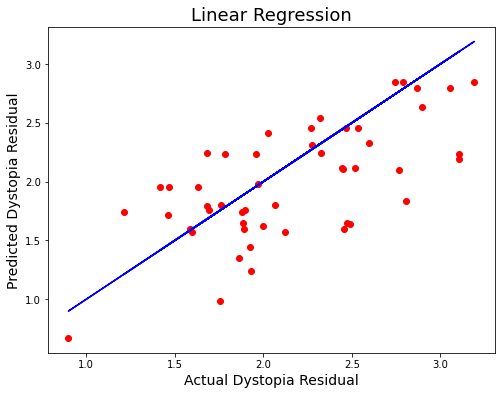

In [61]:

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Dystopia Residual',fontsize=14)
plt.ylabel('Predicted Dystopia Residual',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [49]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred1=dt.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred1))
print('Mean Sqared error',mean_squared_error(y_test,pred1))

0.28408705932323053
Mean absolute error 0.35775180000000006
Mean Sqared error 0.20131464925800002


In [45]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred1=rf.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred1))
print('Mean Sqared error',mean_squared_error(y_test,pred1))

0.28408705932323053
Mean absolute error 0.30461726199999994
Mean Sqared error 0.1549444764687822


In [46]:
sv=SVR()
sv.fit(x_train,y_train)
pred1=sv.predict(x_test)
print(r2_score(y_test,pred))
print('Mean absolute error',mean_absolute_error(y_test,pred1))
print('Mean Sqared error',mean_squared_error(y_test,pred1))

0.28408705932323053
Mean absolute error 0.42609184179191645
Mean Sqared error 0.2869912296197314


In [47]:
from sklearn.model_selection import cross_val_score

In [50]:
print(cross_val_score(dt,x,y,cv=5).mean())

-1.440074250666933


In [51]:
print(cross_val_score(rf,x,y,cv=5).mean())

-0.6187695941508183


In [52]:
print(cross_val_score(sv,x,y,cv=5).mean())

-0.5585735609222294


# Regularization

In [54]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

In [55]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
gv = GridSearchCV(ls,parameters)
gv.fit(x_train,y_train)

print(gv.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [62]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
Model=r2_score(y_test,pred_ls)
print(Model)

0.9935804974531864


In [63]:
print(cross_val_score(ls,x,y,cv=5).mean())

0.978748883885169


# Saving Model

In [64]:
import pickle
filename = 'Happiness.pkl'
pickle.dump(ls, open(filename, 'wb'))

In [66]:
loaded_model = pickle.load(open('Happiness.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9935804974531864
